# Bike Share Predication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
#day = pd.read_csv("day.csv")

In [3]:
hour = pd.read_csv("hour.csv")

In [5]:
#day.head(3)

In [6]:
hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [ ]:
#day.shape

(731, 16)

In [10]:
hour.shape

(17379, 17)

In [13]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [99]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# EDA

In [204]:
#hour = hour.drop(['instant','dteday','casual','registered'],axis=1)

In [205]:
hour.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
#Time-series plots for bike demand  #1:spring, 2:summer, 3:Autumn, 4:winter

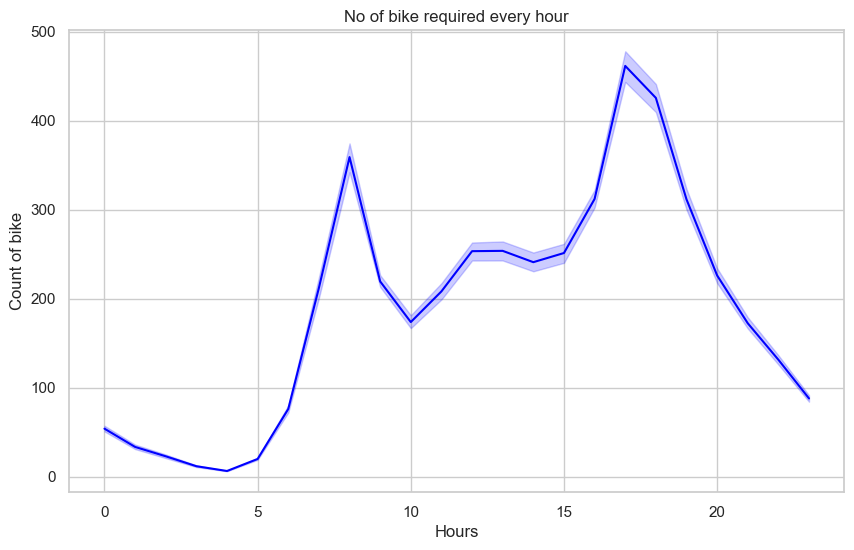

In [206]:
plt.figure(figsize=(10, 6)) 
sns.lineplot(data=hour, x='hr', y='cnt',color='blue')
plt.xlabel('Hours')
plt.ylabel('Count of bike')
plt.title('No of bike required every hour')
plt.show()

* Note : Peak Hours: High demand at 8 AM (350 bikes) and 5 PM (450+ bikes).

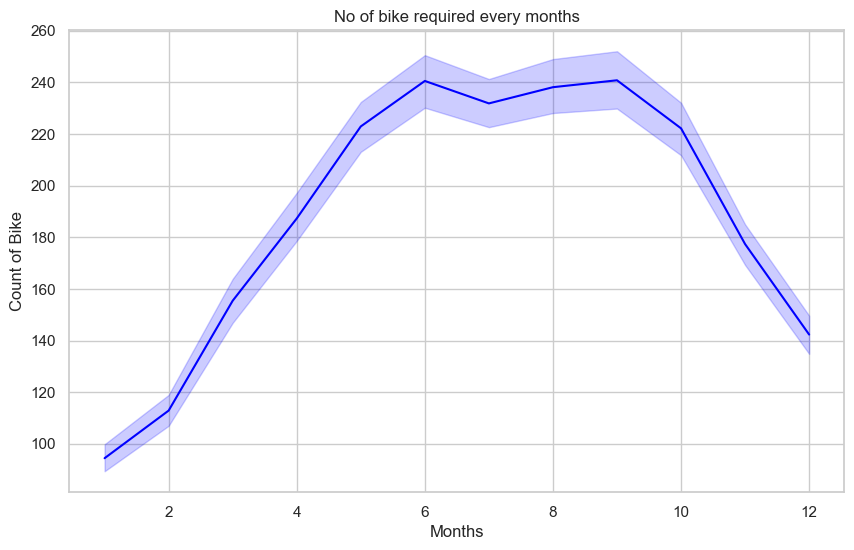

In [159]:
plt.figure(figsize =(10,6))
sns.lineplot(data= hour ,x='mnth',y='cnt',color = 'blue')
plt.xlabel('Months')
plt.ylabel('Count of Bike')
plt.title("No of bike required every months")
plt.show()

* Note:  High Demand (June–October): 220–240 bikes per hour on average

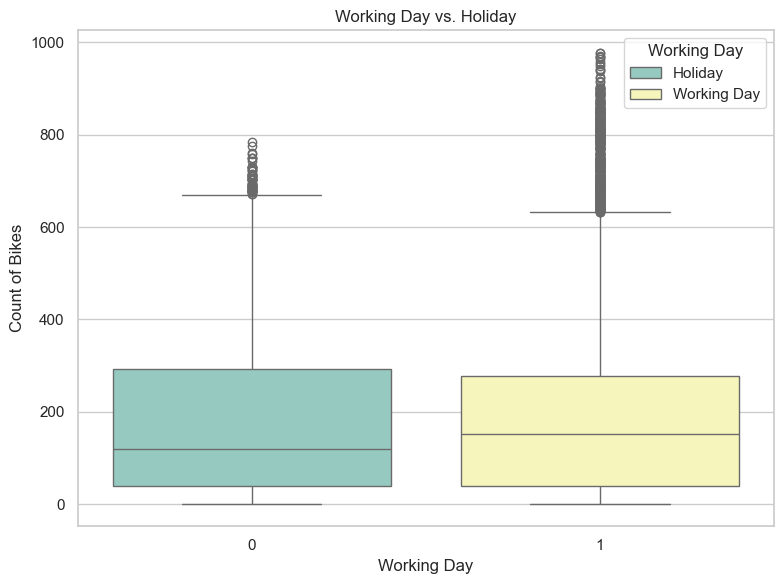

In [183]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=hour, y='cnt', x='workingday', hue='workingday', palette="Set3")  # Use a palette
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Holiday', 'Working Day']
for i, label in enumerate(new_labels):
    labels[i] = label 
ax.legend(handles, labels, title="Working Day", bbox_to_anchor=(1, 1), loc='upper right') 
plt.xlabel('Working Day')
plt.ylabel('Count of Bikes')
plt.title('Working Day vs. Holiday')
plt.tight_layout()
plt.show()

* Note :Higher demand on working days, with more variability and Lower & more stable demand on holidays (possibly due to fewer commuters).

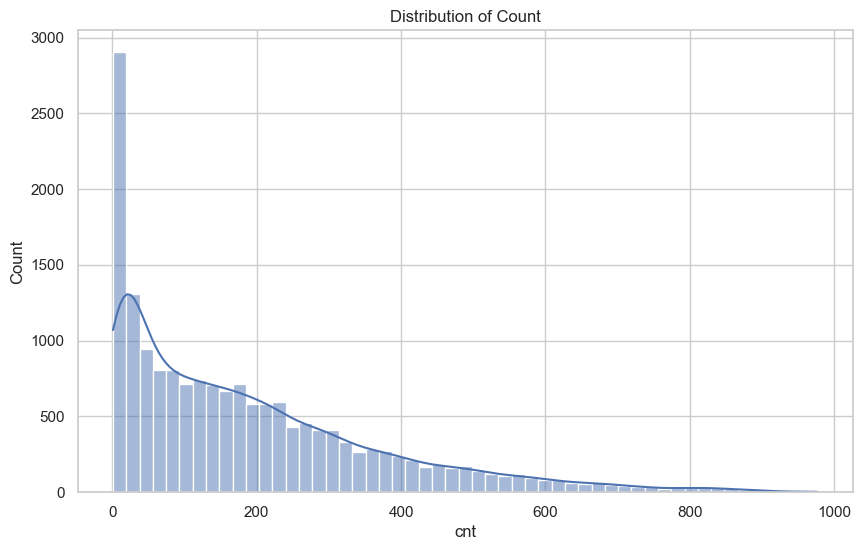

In [199]:
plt.figure(figsize= (10,6))
sns.histplot(data =hour, x= 'cnt', kde =True)
plt.title('Distribution of Count')
plt.show()

* Note :Some extreme high-demand periods exist.

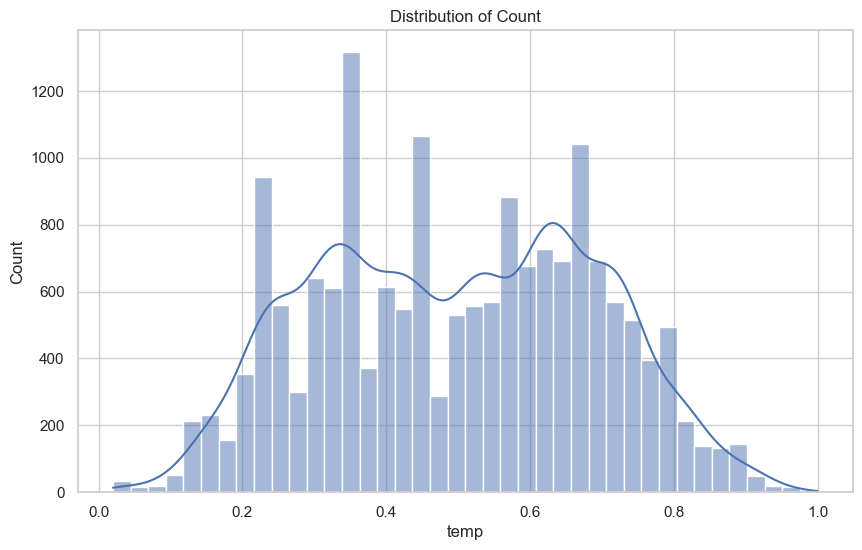

In [203]:
plt.figure(figsize= (10,6))
sns.histplot(data =hour, x= 'temp', kde =True)
plt.title('Distribution of Count')
plt.show()

* Note :No extreme temperature variations.

# Standardization

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
hour = hour.drop(columns=['yr'])

In [9]:
hour.head(2)

,instant,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [456]:
scaled = MinMaxScaler()

In [457]:
scaled_fit = scaled.fit(hour[['temp','atemp','hum','windspeed']])

In [458]:
scaled_transform = scaled.transform(hour[['temp','atemp','hum','windspeed']])

In [459]:
scaled_transform.shape

(17379, 4)

In [460]:
print (f"After tranforming min value is {scaled_transform.min(axis= 0)}")

After tranforming min value is [0. 0. 0. 0.]


In [461]:
print (f"After tranforming max value is {scaled_transform.max(axis= 0)}")

After tranforming max value is [1. 1. 1. 1.]


In [462]:
scaled_df =pd.DataFrame(scaled_transform,columns = ['temp','atemp','hum','windspeed'])

In [463]:
scaled_df.reset_index(drop=True, inplace=True)

In [464]:
scaled_df.head(1)

,temp,atemp,hum,windspeed
0,0.22449,0.2879,0.81,0.0


In [465]:
hour.head(1)

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16


In [492]:
cat_data = hour.iloc[:,0:7]

In [493]:
cat_data.reset_index(drop = True, inplace =True)

In [494]:
cat_data.head(2)

,season,mnth,hr,holiday,weekday,workingday,weathersit
0,1,1,0,0,6,0,1
1,1,1,1,0,6,0,1


# ML Algorithm

In [469]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [495]:
X = pd.concat([cat_data, scaled_df], axis=1)

In [499]:
hour.shape

(17379, 12)

In [498]:
X.shape

(17379, 11)

In [500]:
y = hour.iloc[:,-1:]

In [503]:
y.shape

(17379, 1)

In [504]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20 ,random_state = 42)

In [505]:
rfr = RandomForestRegressor(n_estimators=100)

In [506]:
final_fit = rfr.fit(X_train, y_train)

C:\Users\Ravi Yadav\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [511]:
final_fit.score(X_train, y_train)  # Training Score 

0.9806349490263246

In [510]:
final_fit.score(X_test, y_test) 

0.8659011389061596

In [537]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def compare_models(models, X_train, y_train, X_test, y_test):
    results = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Predict
        preds = model.predict(X_test)
        
        # Calculate RMSE & R² Score
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)
        
        # Store results
        results[name] = {'RMSE': rmse, 'R² Score': r2}
    
    # Print results
    for name, metrics in results.items():
        print(f"{name}: RMSE = {metrics['RMSE']:.4f}, R² Score = {metrics['R² Score']:.4f}")
    
    # Select the best model (lowest RMSE)
    best_model = min(results, key=lambda x: results[x]['RMSE'])
    print(f"\n✅ Best Model: {best_model} (Lowest RMSE)")
    
    return models[best_model]  # Return the best model for predictions


In [538]:
# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Compare and get the best model
best_model = compare_models(models, X_train, y_train, X_test, y_test)


C:\Users\Ravi Yadav\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest: RMSE = 65.2321, R² Score = 0.8656
XGBoost: RMSE = 64.1241, R² Score = 0.8701

✅ Best Model: XGBoost (Lowest RMSE)


In [539]:
import pandas as pd

def predict_bike_demand(model, season, month, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed):
    # Create input DataFrame
    input_data = pd.DataFrame([[season, month, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed]],
                              columns=['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'])
    
    # Predict bike demand
    predicted_bikes = model.predict(input_data)[0]
    
    print(f"🚲 Predicted Bike Demand: {int(predicted_bikes)} bikes required")
    return int(predicted_bikes)


In [541]:
# Predict demand for April 1, 2025, at 8 AM
predict_bike_demand(best_model, season=2, month=4, hr=8, holiday=0, weekday=2, workingday=1, 
                    weathersit=1, temp=0.5, atemp=0.55, hum=0.35, windspeed=0.2)


🚲 Predicted Bike Demand: 525 bikes required


525

In [542]:
import joblib

# Save the best model
joblib.dump(best_model, 'bike_demand_model.pkl')
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [544]:
#pip install flask joblib pandas

# Thank You 
# Swatantra Yadav 
# swtantra.yadav2027@gmail.com
# LinkedIn :https://www.linkedin.com/in/contactswatantrayadav2027/
# GitHub : https://github.com/ydv2027